In [5]:
import pandas as pd

city_name = input("What is the City?")
input_file = city_name+'/Raw/historical_daily_raw.csv'

#Import raw file
df = pd.read_csv(input_file)
print(len(df.index))

16224


     datetime    tempmin  moving_avg
0  1980-12-31  -5.388889         NaN
1  1981-12-31 -17.388889         NaN
2  1982-12-31 -18.222222  -13.666667
3  1983-12-31  -8.111111  -14.574074
4  1984-12-31  -3.722222  -10.018519
5  1985-12-31  -9.055556   -6.962963
6  1986-12-31 -10.000000   -7.592593
7  1987-12-31 -10.666667   -9.907407
8  1988-12-31  -3.944444   -8.203704
9  1989-12-31  -4.555556   -6.388889
10 1990-12-31  -4.111111   -4.203704
11 1991-12-31  -8.500000   -5.722222
12 1992-12-31  -6.888889   -6.500000
13 1993-12-31  -4.666667   -6.685185
14 1994-12-31  -7.277778   -6.277778
15 1995-12-31  -7.222222   -6.388889
16 1996-12-31  -5.555556   -6.685185
17 1997-12-31  -7.888889   -6.888889
18 1998-12-31  -5.000000   -6.148148
19 1999-12-31  -8.722222   -7.203704


/var/folders/2m/s5dls335695361g_hk_1ckb80000gn/T/ipykernel_14627/3534323380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_temp_df['datetime'] = pd.to_datetime(max_temp_df['datetime'])


<Axes: xlabel='datetime'>

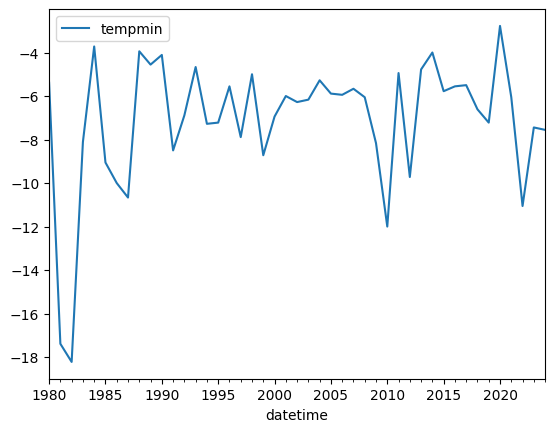

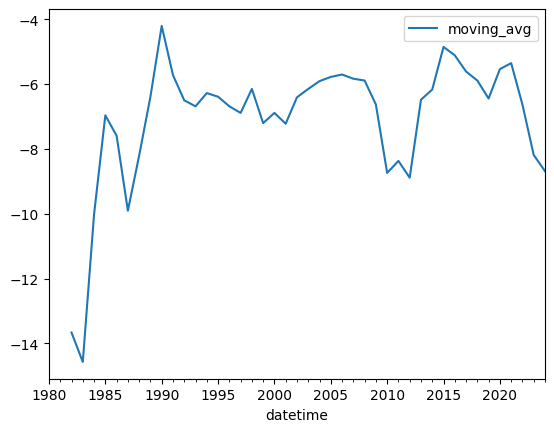

In [6]:
data_value = 'tempmin'
frequency = 'monthly'
max_temp_df = df[['datetime',data_value]]
max_temp_df['datetime'] = pd.to_datetime(max_temp_df['datetime'])
max_temp_df = max_temp_df.groupby([pd.Grouper(key='datetime', freq='1YE')], as_index=False).min()

# Group based on frequency
# if(frequency == 'monthly'):
#     max_temp_df = max_temp_df.groupby([pd.Grouper(key='datetime', freq='1M')]).max()
# elif(frequency == 'weekly'):
#     max_temp_df = max_temp_df.groupby([pd.Grouper(key='datetime', freq='1W')]).max()
# else:
#     max_temp_df = max_temp_df.groupby([pd.Grouper(key='datetime', freq='1D')]).max()

#convert farenheit to celsius
max_temp_df[data_value] = max_temp_df[data_value].map(lambda a: (a-32) * 5/9)

# Calculate moving average for maxtemp
max_temp_df.plot(x='datetime', y=data_value) 

max_temp_df['moving_avg'] = max_temp_df[data_value].rolling(3).mean()
print(max_temp_df.head(20))

max_temp_df.plot.line(x='datetime', y='moving_avg') 
max_temp_df.plot.line(x='datetime', y='tempmin') 


In [7]:

# if(type == 'json'):
#     max_temp_df.to_json(output_location+'.json', orient='table')
# elif(type == 'csv'):
#     max_temp_df.to_csv(output_location+'.csv')
# elif(type == 'both'):
#     max_temp_df.to_json(output_location+'.json', orient='table')
#     max_temp_df.to_csv(output_location+'.csv')